<a href="https://colab.research.google.com/github/GitBar20/AI/blob/main/Test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Работа с операционной системой
import os

# Работа с массивами данных
import numpy as np

# Работа с таблицами
import pandas as pd

# Основные слои
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input, Conv2DTranspose, concatenate, Activation, MaxPooling2D, Conv2D, BatchNormalization

# класс для использования Functional API
from tensorflow.keras import Model

# Оптимизаторы для обучения модели
from tensorflow.keras.optimizers import Adam

# Функции-утилиты
from tensorflow.keras import utils

# Готовые датасеты
from tensorflow.keras.datasets import mnist, fashion_mnist

# Коллбэки для выдачи информации в процессе обучения
from tensorflow.keras.callbacks import LambdaCallback

# Отрисовка изображения
from tensorflow.keras.preprocessing import image

# Разбиение на тренировочную и тестовую выборки
from sklearn.model_selection import train_test_split

# Функция среднеквадратической ошибки для расчетов вручную
from sklearn.metrics import mean_squared_error

# Отрисовка графиков
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Функция сборки сверточного автокодировщика
def create_base_ae(in_shape):
    # Энкодер, вход нейросети
    img_input = Input(in_shape)

    # Энкодер, первый блок
    # 1.1. Двумерная свертка
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(img_input)
    # 1.2. Нормализация
    x = BatchNormalization()(x)
    # 1.3. Двумерная свертка
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    # 1.4. Нормализация
    x = BatchNormalization()(x)
    # 1.5. Снижение размерности и обобщение данных
    x = MaxPooling2D()(x)

    # Энкодер, второй блок
    # 2.1. Двумерная свертка
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    # 2.2. Нормализация
    x = BatchNormalization()(x)
    # 2.3. Двумерная свертка
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    # 2.4. Нормализация
    x = BatchNormalization()(x)


    # На выходе кодировщика и на входе декодировщика z - вектор латентного пространства
    # 2.5. Снижение размерности и обобщение данных
    z = MaxPooling2D()(x)


    # Декодер, первый блок
    # 1.1. Транспонированная свертка - повышение размерности данных
    x = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same', activation='relu')(z)
    # 1.2. Нормализация
    x = BatchNormalization()(x)
    # 1.3. Двумерная свертка
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    # 1.4. Нормализация
    x = BatchNormalization()(x)
    # 1.5. Двумерная свертка
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    # 1.6. Нормализация
    x = BatchNormalization()(x)

    # Декодер, второй блок
    # 2.1. Транспонированная свертка - повышение размерности данных
    x = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same', activation='relu')(x)
    # 2.2. Нормализация
    x = BatchNormalization()(x) # слой нормализации данных
    # 2.3. Двумерная свертка
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    # 2.4. Нормализация
    x = BatchNormalization()(x) # слой нормализации данных
    # 2.5. Двумерная свертка
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    # 2.6. Нормализация
    x = BatchNormalization()(x)

    # Декодер, финальный слой двумерной свертки, выдающий итоговое изображение
    outputs = Conv2D(in_shape[-1], (3, 3), activation='sigmoid', padding='same')(x)

    # Сборка модели, на входе оригинальное изображение, на выходе - сжатое-восстановленное
    model = Model(inputs=img_input, outputs=outputs)

    # Компиляция сети, назначение оптимизатора Adam + среднеквадратическая ошибка
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

    # Возврат готовой модели
    return model

In [3]:
base_dir = "/content/drive/MyDrive/Build /Dset_build"

In [4]:
patch = 0
x_train = []
y_train = []
img_height = 1000
img_wight = 1000
for patch in os.listdir(base_dir):
  for img in os.listdir(base_dir + "/" + patch):
      x_train.append(image.img_to_array(image.load_img(base_dir + "/" + patch +"/"+ img,
                                                       target_size=(img_height,img_wight),
                                                       color_mode="grayscale")))
      y_train.append(0)

In [5]:
x_train = np.array(x_train)
y_train = np.array(y_train)
print("размер x", x_train.shape)
print("размер y", y_train.shape)


размер x (31, 1000, 1000, 1)
размер y (31,)


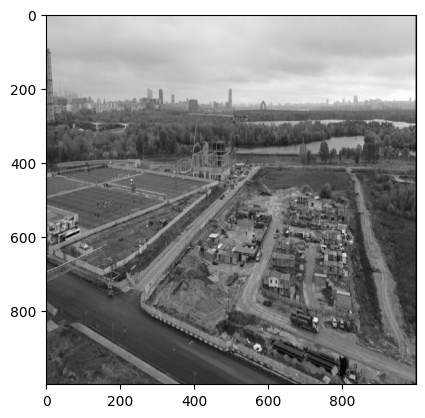

0


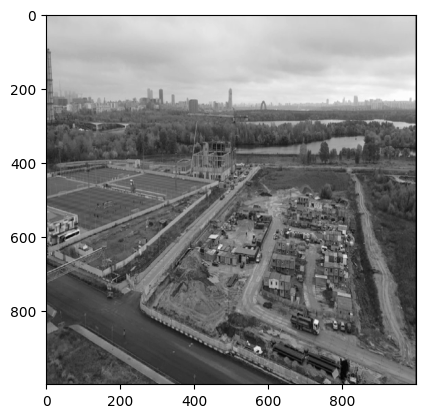

0


In [6]:
N_example = 1
plt.imshow(np.reshape(x_train[N_example],(1000, 1000)), cmap = "gray")
plt.show()
print(y_train[N_example])
N_example = 5
plt.imshow(np.reshape(x_train[N_example],(1000, 1000)), cmap = "gray")
plt.show()
print(y_train[N_example])

In [7]:
x_shuffle = x_train.copy()
np.random.shuffle(x_shuffle)


In [8]:
x_train = x_train.reshape(x_train.shape[0],1000000)
print(x_train.shape)

(31, 1000000)


In [9]:
x_train = x_train.astype("float32")
x_train = x_train / 255
print(y_train.shape)
y_train = utils.to_categorical(y_train,0)
print(y_train.shape)



(31,)
(31, 1)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
print(f"Размер тренировочной выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер тренировочной выборки: (24, 1000000)
Размер тестовой выборки: (7, 1000000)


In [11]:
# Проверка формы данных
print(X_train.shape)
print(X_test.shape)

(24, 1000000)
(7, 1000000)


In [12]:
# Функция последовательного вывода нескольких изображений для сравнения
def plot_images(x_data, pred, n=5):

    plt.figure(figsize=(14, 7))                     # Размер полотна

    for i in range(1, n + 1):                              # Повтор n раз:
        index = np.random.randint(0, pred.shape[0]) # Выбор случайного индекса

        # Показ картинки с индексом index из набора x_data
        ax = plt.subplot(2, n, i)               # Картинка располагается в верхнем ряду
        plt.imshow(x_data[index].squeeze(), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Показ картинки с тем же индексом из предсказания автокодировщика
        ax = plt.subplot(2, n, i + n)           # Картинка располагается в нижнем ряду
        plt.imshow(pred[index].squeeze(), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

In [13]:
X_train = X_train.reshape(-1, 1000, 1000, 1)

In [14]:
# Сборка автокодировщика для формы картинок датасета
ae_mnist = create_base_ae(X_train.shape[1:])

In [ ]:
# Сводка архитектуры автокодировщика
ae_mnist.summary()

In [ ]:
# Обучение модели автокодировщика, на входе и выходе одни и те же данные
history = ae_mnist.fit(X_train, X_train,
                       epochs=50,
                       batch_size=256,
                       validation_data = (X_test, X_test))

Epoch 1/50
